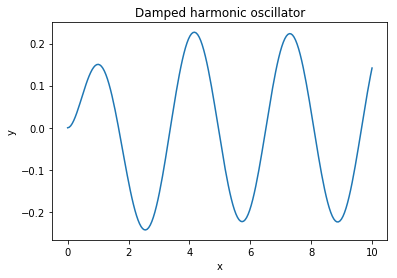

In [4]:
# Second-order ordinary differential equations
# The damped simple harmonic motion equation
# y''+2y'+2y=cos(2x), y(0)=0, y'(0)=0
# We can turn this into two first-order equations
# by defining a new dependent variable
# z=y', z'+2z+2y=cos(2x), z(0)=y(0)=0
# We can solve this system of ODEs 
# using odeint with lists

# y'=z
# z'=-2z-2y+cos(2x)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]

U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

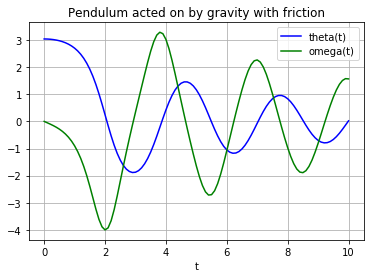

In [6]:
# The second order differential equation for the angle theta 
# of a pendulum acted on by gravity with friction can be written
# theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
# where b and c are positive constants
# and a prime denotes a derivative
# We convert this equation to a system of first order equations
# We define the angular velocity omega(t)
# Therefore, we obtain the system
# theta'(t) = omega(t)
# omega'(t) = -b*omega(t) - c*sin(theta(t))
# Let y be the vector [theta, omega]

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

# For initial conditions, we assume the pendulum is 
# nearly vertical [theta(0)=pi-0.1] and is
# initially at rest [omega(0)=0]
y0 = [np.pi - 0.1, 0.0]

# We will generate a solution at 101 evenly spaced samples
# in the interval 0<=t<=10
t = np.linspace(0, 10, 101)              # array of times

# The solution is an array with shape (101, 2)
# The first column is theta(t)
# and the second is omega(t)
sol = odeint(pend, y0, t, args=(b, c))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title("Pendulum acted on by gravity with friction")
plt.show()

Text(0,0.5,'y = dx/dt')

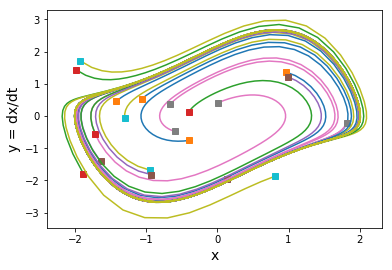

In [11]:
# Oscilatorul Van der Pol 
# Ecuatie diferentiala ordinara de ordinul doi cu parametrul a 
# x''-a(1-x*x)x'+x=0
# |x|>1: pierde energie
# |x|<1: absoarbe energie
# model pentru circuite electrice
# modeleaza procese biologice precum bataia inimii si ritmurile circadiene
# x'=y
# y'=a(1-x*x)y-x

from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dZ_dt(Z, t, a = 1.0):
    x, y = Z[0], Z[1]
    return [y, a*(1-x**2)*y - x]

def random_ic(scalefac=2.0): # generate initial condition
    return scalefac*(2.0*np.random.rand(2) - 1.0)

ts = np.linspace(0.0, 40.0, 400)
nlines = 20

for ic in [random_ic() for i in range(nlines)]:
    Zs = odeint(dZ_dt, ic, ts, args=(1.0,))
    plt.plot(Zs[:,0], Zs[:,1])
    plt.plot([Zs[0,0]],[Zs[0,1]], "s") # plot the first point
    
plt.xlabel("x", fontsize=14)
plt.ylabel("y = dx/dt", fontsize=14)

# All curves tend towards a limit cycle

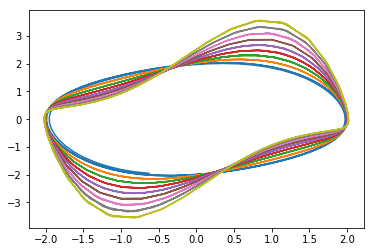

In [12]:
# Investigate how the limit cycle varies with the parameter a

avals = np.arange(0.2, 2.0, 0.2) # parameters
minpt = int(len(ts) / 2) # look at late-time behaviour

for a in avals:
    Zs = odeint(dZ_dt, random_ic(), ts, args=(a,))
    plt.plot(Zs[minpt:,0], Zs[minpt:,1])